In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.set_option('display.max_columns', 500)

In [2]:
from config import TRAINING_DATA_DIR, EVALUATION_DATA_DIR, BASE_DIR

In [3]:
m = pd.read_csv(TRAINING_DATA_DIR + "\\measurement.csv")
v = pd.read_csv(TRAINING_DATA_DIR + "\\visit_occurrence.csv")
gs = pd.read_csv(TRAINING_DATA_DIR + "\\goldstandard.csv")

data_dict = pd.read_csv("data_dictionary.csv")
m.shape, v.shape

((197498, 20), (42515, 17))

In [4]:
m.head()

,person_id,measurement_id,measurement_concept_id,measurement_date,measurement_datetime,measurement_time,measurement_type_concept_id,operator_concept_id,value_as_number,value_as_concept_id,unit_concept_id,range_low,range_high,provider_id,visit_occurrence_id,visit_detail_id,measurement_source_value,measurement_source_concept_id,unit_source_value,value_source_value
0,516,1,3000905,2015-11-14,2015-11-14 14:41:00,2018-07-14,44818702,4172703.0,4.90,NaN,8848.0,4.30,10.00,NaN,NaN,NaN,NaN,3000905,10*3/uL,4.90
1,1193,2,3028288,2013-01-24,2013-01-24 14:41:00,2015-12-28,44818702,4172703.0,57.00,NaN,NaN,NaN,130.00,NaN,NaN,NaN,NaN,3028288,NaN,57.00
2,949,3,3027114,2017-09-06,2017-09-06 14:41:00,2017-06-20,44818702,4172703.0,216.00,NaN,8840.0,NaN,200.00,NaN,NaN,NaN,NaN,3027114,mg/dL,216.00
3,1059,4,3012030,2018-12-23,2018-12-23 14:41:00,2019-02-26,44818702,4172703.0,32.50,NaN,NaN,27.30,33.60,NaN,NaN,NaN,NaN,3012030,pg,32.50
4,348,5,3016723,2012-10-26,2012-10-26 14:41:00,2019-03-01,44818702,4172703.0,0.93,NaN,8840.0,0.51,1.18,NaN,NaN,NaN,NaN,3016723,mg/dL,0.93


In [5]:
v.head()

,person_id,visit_occurrence_id,visit_concept_id,visit_start_date,visit_start_datetime,visit_end_date,visit_end_datetime,visit_type_concept_id,provider_id,care_site_id,visit_source_value,visit_source_concept_id,admitting_source_concept_id,admitting_source_value,discharge_to_concept_id,discharge_to_source_value,preceding_visit_occurrence_id
0,42,NaN,9201,2011-06-18,2011-06-18,2011-06-27,2011-06-27,44818518,NaN,NaN,NaN,9201,32209,NaN,32209,NaN,NaN
1,554,NaN,581479,2012-08-31,2012-08-31,2012-08-31,2012-08-31,44818518,NaN,NaN,NaN,581479,32209,NaN,32209,NaN,NaN
2,889,NaN,9203,2016-01-10,2016-01-10,2016-01-12,2016-01-12,44818518,NaN,NaN,NaN,9203,32209,NaN,32209,NaN,NaN
3,970,NaN,9201,2010-05-18,2010-05-18,2010-05-23,2010-05-23,44818518,NaN,NaN,NaN,9201,32209,NaN,32209,NaN,NaN
4,568,NaN,32037,2019-06-21,2019-06-21,2019-06-30,2019-06-30,44818518,NaN,NaN,NaN,32037,32209,NaN,32209,NaN,NaN


In [6]:
# delete the columns which have high NaN
m_s = ["person_id", "measurement_concept_id", "measurement_date",
       "measurement_time", "value_as_number", "range_low", "range_high", "value_source_value"]

v_s = ["person_id", "visit_concept_id","visit_start_date", "visit_end_date"]
m = m[m_s]
v = v[v_s]


m['measurement_time'] = pd.to_datetime(m['measurement_time'])
m["measurement_date"] = pd.to_datetime(m["measurement_date"])

v["visit_start_date"] = pd.to_datetime(v["visit_start_date"])
v["visit_end_date"] = pd.to_datetime(v["visit_end_date"])
 
v.head()

,person_id,visit_concept_id,visit_start_date,visit_end_date
0,42,9201,2011-06-18,2011-06-27
1,554,581479,2012-08-31,2012-08-31
2,889,9203,2016-01-10,2016-01-12
3,970,9201,2010-05-18,2010-05-23
4,568,32037,2019-06-21,2019-06-30


In [7]:
m.head()

,person_id,measurement_concept_id,measurement_date,measurement_time,value_as_number,range_low,range_high,value_source_value
0,516,3000905,2015-11-14,2018-07-14,4.90,4.30,10.00,4.90
1,1193,3028288,2013-01-24,2015-12-28,57.00,NaN,130.00,57.00
2,949,3027114,2017-09-06,2017-06-20,216.00,NaN,200.00,216.00
3,1059,3012030,2018-12-23,2019-02-26,32.50,27.30,33.60,32.50
4,348,3016723,2012-10-26,2019-03-01,0.93,0.51,1.18,0.93


In [8]:
m[m['measurement_concept_id'] == 3000963].head()
# 3000963 hemoglobin. 

,person_id,measurement_concept_id,measurement_date,measurement_time,value_as_number,range_low,range_high,value_source_value
23,399,3000963,2012-12-19,2016-04-15,11.9,13.0,18.0,11.9
85,255,3000963,2013-08-09,2016-11-30,11.9,11.5,15.5,11.9
119,570,3000963,2019-05-07,2019-01-14,8.5,13.0,18.0,8.5
144,751,3000963,2014-02-02,2017-03-27,13.9,11.5,15.5,13.9
234,535,3000963,2015-10-08,2019-02-13,9.0,13.0,18.0,9.0


In [9]:
gs_status_ones = gs[gs["status"] == 1].person_id.values
gs_status_ones

array([   8,   12,   33,   58,   70,   73,   91,   96,  103,  144,  152,
        175,  177,  184,  189,  192,  220,  221,  224,  226,  230,  239,
        267,  330,  336,  345,  346,  359,  385,  389,  390,  400,  404,
        417,  440,  448,  455,  457,  474,  508,  509,  517,  532,  537,
        546,  578,  579,  587,  604,  613,  620,  630,  644,  663,  665,
        679,  690,  713,  732,  737,  739,  742,  753,  764,  772,  777,
        779,  782,  823,  824,  831,  837,  838,  850,  863,  866,  876,
        907,  920,  921,  938,  945,  947,  949, 1001, 1002, 1014, 1031,
       1034, 1050, 1052, 1086, 1087, 1106, 1124, 1128, 1137, 1142, 1168,
       1169, 1171, 1188, 1203, 1216, 1225, 1233, 1234], dtype=int64)

In [10]:
print("""status 1 person count {}
status 0 person count {}""".format(len(gs_status_ones), gs.shape[0] - len(gs_status_ones))) 

status 1 person count 107
status 0 person count 1144


In [11]:
def intersection(lst1, lst2): 
    return [value for value in lst1 if value in lst2] 

In [12]:
m["is_normal"] = (m["value_as_number"] >= m["range_low"]) & (m["value_as_number"] <= m["range_high"])

In [13]:
m.is_normal.value_counts()

True     103932
False     93566
Name: is_normal, dtype: int64

In [14]:
m[m['measurement_concept_id'] == 3000963][m['is_normal'] == False].shape

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(1904, 9)

In [15]:
print("unique measurement concept id count: {}".format(len(m.measurement_concept_id.unique())))

unique measurement concept id count: 389


In [16]:
anormal_measurements = {}
for mc_id in m.measurement_concept_id:
    if mc_id not in anormal_measurements.keys():
        anormal_measurements[mc_id] = m[m['measurement_concept_id'] == mc_id][m['is_normal'] == False]
    

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boole

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boole

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boole

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boole

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boole

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boole

In [17]:
print("# of is_normal=false for measurements is {}".format(len(anormal_measurements)))

# of is_normal=false for measurements is 389


In [18]:
bad_hemoglobin_df = m[m['measurement_concept_id'] == 3000963][m['is_normal'] == False]
good_hemoglobin_df = m[m['measurement_concept_id'] == 3000963][m['is_normal'] == True]

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [19]:
bad_hemoglobin_df.head()

,person_id,measurement_concept_id,measurement_date,measurement_time,value_as_number,range_low,range_high,value_source_value,is_normal
23,399,3000963,2012-12-19,2016-04-15,11.9,13.0,18.0,11.9,False
119,570,3000963,2019-05-07,2019-01-14,8.5,13.0,18.0,8.5,False
234,535,3000963,2015-10-08,2019-02-13,9.0,13.0,18.0,9.0,False
260,281,3000963,2020-07-18,2015-10-16,10.1,11.5,15.5,10.1,False
306,665,3000963,2011-12-10,2019-02-06,12.7,13.0,18.0,12.7,False


In [20]:
bad_hemoglobin_and_sick = intersection(bad_hemoglobin_df.person_id.values, gs_status_ones)

In [21]:
len(bad_hemoglobin_and_sick)

170

In [22]:
is_seen = {}
for key in anormal_measurements.keys():
    if key not in is_seen.keys(): 
        anormal_measurements[key] = intersection(anormal_measurements[key].person_id.values, gs_status_ones)
    is_seen[key] = True

In [23]:
anormal_measurements_lengths = {}
for key in anormal_measurements.keys():
    if key not in anormal_measurements_lengths.keys():
        anormal_measurements_lengths[key] = len(anormal_measurements[key])

In [24]:
from operator import itemgetter
sorted_anormal = sorted(anormal_measurements_lengths.items(), key=itemgetter(1))[::-1]

In [26]:
# sorted_anormal[:10]
# x_val = [x[0] for x in sorted_anormal[:10]]
# y_val = [x[1] for x in sorted_anormal[:10]]
# y_val

[674, 381, 361, 222, 221, 218, 206, 180, 170, 154]

In [36]:
measurements = v.visit_concept_id.unique()
common_concept_ids = {}
for measurement in sorted_anormal:
    try:
        measurement_name = data_dict[data_dict['concept_id'] == measurement[0]]['concept_name'].values[0]
        common_concept_ids[measurement] = measurement_name
    except:
        continue
# v['visit_concept_id'] = v['visit_concept_id'].map(common_concept_ids)

In [37]:
common_concept_ids

{(3025315, 674): 'Body weight',
 (3020416, 381): 'Erythrocytes [#/volume] in Blood by Automated count',
 (3000905, 361): 'Leukocytes [#/volume] in Blood by Automated count',
 (3022192, 222): 'Triglyceride [Mass/volume] in Serum or Plasma',
 (3022250,
  221): 'Lactate dehydrogenase [Enzymatic activity/volume] in Serum or Plasma by Lactate to pyruvate reaction',
 (3013650, 218): 'Neutrophils [#/volume] in Blood by Automated count',
 (3011960, 206): 'Natriuretic peptide B [Mass/volume] in Serum or Plasma',
 (3027114, 180): 'Cholesterol [Mass/volume] in Serum or Plasma',
 (3000963, 170): 'Hemoglobin [Mass/volume] in Blood',
 (3028288,
  154): 'Cholesterol in LDL [Mass/volume] in Serum or Plasma by calculation',
 (3016723, 147): 'Creatinine [Mass/volume] in Serum or Plasma',
 (3036277, 136): 'Body height',
 (3034426, 133): 'Prothrombin time (PT)',
 (3049187,
  133): 'Glomerular filtration rate/1.73 sq M.predicted among non-blacks [Volume Rate/Area] in Serum, Plasma or Blood by Creatinine-ba

In [66]:
x_val = []
y_val = []
for key, value in common_concept_ids.items():
    if len(x_val) != 3 and len(y_val) != 3:
        x_val.append(value)
        y_val.append(key[1])

In [30]:
import matplotlib.pyplot as plt

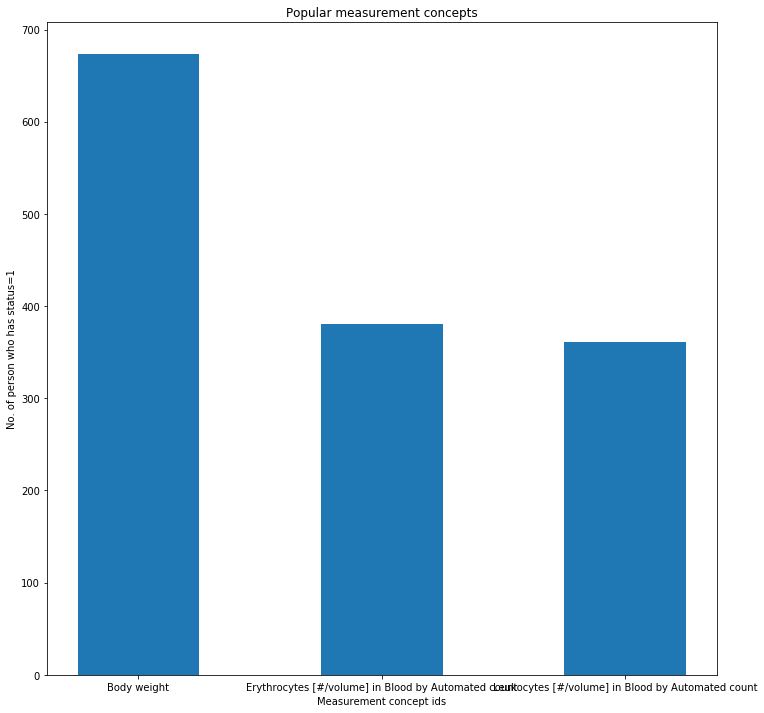

C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


In [67]:
fig = plt.figure(figsize=(12, 12))

# creating the bar plot 
plt.bar(x_val, y_val, width=0.5) 
  
plt.xlabel("Measurement concept ids") 
plt.ylabel("No. of person who has status=1") 
plt.title("Popular measurement concepts") 
plt.show() 
fig.show()

In [15]:
# 404 id li person gs tablosunda degeri 1. o degerle hemoglobin degerlerini karsilastiriyorum.
m[m['measurement_concept_id'] == 3000963][m['person_id'] == 404]

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,person_id,measurement_concept_id,measurement_date,measurement_time,value_as_number,range_low,range_high,value_source_value
16409,404,3000963,2012-09-06,2019-03-13,8.0,13.0,18.0,8.0
94937,404,3000963,2020-08-01,2015-09-22,11.9,13.0,18.0,11.9
103342,404,3000963,2017-06-04,2019-03-02,10.9,11.5,15.5,10.9


In [10]:
m[m['measurement_concept_id'] == 706163].head()

,person_id,measurement_concept_id,measurement_date,measurement_time,value_as_number,range_low,range_high,value_source_value
6919,100,706163,2016-02-24,2020-05-06,NaN,NaN,NaN,NaN
17075,428,706163,2012-06-12,2020-05-07,NaN,NaN,NaN,NaN
21722,854,706163,2011-09-21,2020-05-07,NaN,NaN,NaN,NaN
26755,403,706163,2020-01-28,2020-03-27,NaN,NaN,NaN,NaN
31354,53,706163,2015-09-29,2020-05-06,NaN,NaN,NaN,NaN


In [68]:
# This is the standard concept mapped from the source value which represents a measurement.
measurements = m.measurement_concept_id.unique()
d_1 = {}
for measurement in measurements:
    try:
        measurement_name = data_dict[data_dict['concept_id'] == measurement]['concept_name'].values[0]
        d_1[measurement] = measurement_name
    except:
        continue
m['measurement_concept_id'] = m['measurement_concept_id'].map(d_1)

In [69]:
measurements = v.visit_concept_id.unique()
d_2 = {}
for measurement in measurements:
    try:
        measurement_name = data_dict[data_dict['concept_id'] == measurement]['concept_name'].values[0]
        d_2[measurement] = measurement_name
    except:
        continue
v['visit_concept_id'] = v['visit_concept_id'].map(d_2)

In [70]:
d_2
# pek bir data yok.

{9201: 'Inpatient Visit',
 581479: 'Ambulatory Rehabilitation Visit',
 9203: 'Emergency Room Visit',
 32037: 'Intensive Care',
 5083: 'Telehealth',
 44790889: 'Telephone call to a patient',
 9202: 'Outpatient Visit'}

In [71]:
def find_num(s):
    res = ""
    for i in str(s):
        if i != 'd' and i!=' ':
            res+=i
        else:
            return int(res) 

In [72]:
valid = ["Inpatient", "Emergency Room Visit", "Intensive Care"]
a = v[v['person_id'] == 1203].sort_values("visit_start_date", ascending=False)
a = a[a["visit_concept_id"].isin(valid)]
a["year"] = pd.DatetimeIndex(a['visit_start_date']).year
a["month"] = pd.DatetimeIndex(a['visit_start_date']).month

years = a["year"].values
months = a["month"].values
dates = a["visit_start_date"].values
a

,person_id,visit_concept_id,visit_start_date,visit_end_date,year,month
17461,1203,Intensive Care,2020-03-04,2020-03-04,2020,3
40359,1203,Emergency Room Visit,2020-02-03,2020-02-04,2020,2
37543,1203,Emergency Room Visit,2016-09-11,2016-09-18,2016,9
20650,1203,Emergency Room Visit,2016-08-30,2016-09-05,2016,8
38961,1203,Emergency Room Visit,2016-06-22,2016-07-01,2016,6
19281,1203,Intensive Care,2013-06-01,2013-06-06,2013,6
41961,1203,Emergency Room Visit,2013-02-05,2013-02-06,2013,2
41936,1203,Intensive Care,2012-12-30,2013-01-08,2012,12
1276,1203,Emergency Room Visit,2010-08-17,2010-08-22,2010,8


In [73]:
b = m[m['person_id'] == 1203].sort_values("measurement_time", ascending=False)
b["year"] = pd.DatetimeIndex(b['measurement_date']).year
b["month"] = pd.DatetimeIndex(b['measurement_date']).month

b = b[b["year"].isin(years)].reset_index(drop=True) #?

# value_as_number: This is the numerical value of the result of the measurement
b["is_normal"] = (b["value_as_number"] >= b["range_low"]) & (b["value_as_number"] <= b["range_high"])
n_data = pd.DataFrame()
for idx in b.index:
    for date in dates:
#         cur = np.datetime64(b.loc[idx, "measurement_date"])
        cur = (b.loc[idx, "measurement_date"])
        diff = date - cur
        diff_day = find_num(diff)

#         x = np.timedelta64(diff, 'ns')
#         days = x.astype('timedelta64[D]')
#         days = days / np.timedelta64(1, 'D')
        
        if diff_day <= 21 and diff_day >= 0:
            n_data = n_data.append(b.loc[idx], ignore_index=True)
            break

n_data[n_data["is_normal"] == 0].sort_values("measurement_date", ascending=False)

TypeError: ufunc subtract cannot use operands with types dtype('<M8[ns]') and dtype('O')

In [76]:
gs[gs["status"] == 1]
ones = gs[gs["status"] == 1].person_id.values
zeros = gs[gs["status"] == 0].person_id.values

In [12]:
ones_anormals = []
for i in ones:
    valid = ["Inpatient", "Emergency Room Visit", "Intensive Care"]
    a = v[v['person_id'] == i].sort_values("visit_start_date", ascending=False)
    a = a[a["visit_concept_id"].isin(valid)]
    dates = a["visit_start_date"].values
    
    b = m[m['person_id'] == i].sort_values("measurement_time", ascending=False)
    b["year"] = pd.DatetimeIndex(b['measurement_date']).year
    b["month"] = pd.DatetimeIndex(b['measurement_date']).month
    b = b[b["year"].isin(years)].reset_index(drop=True)
    b["is_normal"] = (b["value_as_number"] >= b["range_low"]) & (b["value_as_number"] <= b["range_high"])
    n_data = pd.DataFrame()
    for idx in b.index:
        for date in dates:
            cur = b.loc[idx, "measurement_date"]
            diff = date - cur
            diff_day = find_num(diff)

            if diff_day <= 21 and diff_day >= 0:
                n_data = n_data.append(b.loc[idx], ignore_index=True)
                break
    
    if n_data.shape[0] > 0:

        n_data[n_data["is_normal"] == 0].sort_values("measurement_date", ascending=False)
        for ms in n_data.measurement_concept_id.values:
            ones_anormals.append(ms)


In [181]:
len(ones_anormals)

397

In [182]:
from collections import Counter

In [183]:
Counter(ones_anormals)

Counter({'Erythrocytes [#/volume] in Blood by Automated count': 14,
         'Oxygen [Partial pressure] in Arterial blood': 3,
         'Hematocrit [Volume Fraction] of Blood': 1,
         'Leukocytes [#/volume] in Blood by Automated count': 28,
         'Thyrotropin [Units/volume] in Serum or Plasma by Detection limit <= 0.005 mIU/L': 19,
         'Neutrophils/100 leukocytes in Body fluid': 1,
         'Carcinoembryonic Ag [Mass/volume] in Serum or Plasma': 2,
         'Glomerular filtration rate/1.73 sq M.predicted among blacks [Volume Rate/Area] in Serum, Plasma or Blood by Creatinine-based formula (MDRD)': 3,
         'Potassium [Moles/volume] in Serum or Plasma': 2,
         'Oxygen saturation in Mixed venous blood': 2,
         'Glucose [Mass/volume] in Serum or Plasma': 6,
         'Haptoglobin [Mass/volume] in Serum or Plasma': 1,
         'Protein [Mass/volume] in Serum or Plasma': 3,
         'Anion gap in Serum or Plasma': 2,
         'MCHC [Mass/volume] by Automated count':

In [184]:
zeros_anormals = []
for i in zeros:
    valid = ["Inpatient", "Emergency Room Visit", "Intensive Care"]
    a = v[v['person_id'] == i].sort_values("visit_start_date", ascending=False)
    a = a[a["visit_concept_id"].isin(valid)]
    dates = a["visit_start_date"].values
    
    b = m[m['person_id'] == i].sort_values("measurement_time", ascending=False)
    b["year"] = pd.DatetimeIndex(b['measurement_date']).year
    b["month"] = pd.DatetimeIndex(b['measurement_date']).month
    b = b[b["year"].isin(years)].reset_index(drop=True)
    b["is_normal"] = (b["value_as_number"] >= b["range_low"]) & (b["value_as_number"] <= b["range_high"])
    n_data = pd.DataFrame()
    for idx in b.index:
        for date in dates:
            cur = b.loc[idx, "measurement_date"]
            diff = date - cur
            diff_day = find_num(diff)

            if diff_day <= 21 and diff_day >= 0:
                n_data = n_data.append(b.loc[idx], ignore_index=True)
                break
    
    if n_data.shape[0] > 0:

        n_data[n_data["is_normal"] == 0].sort_values("measurement_date", ascending=False)
        for ms in n_data.measurement_concept_id.values:
            zeros_anormals.append(ms)

In [185]:
Counter(zeros_anormals)

Counter({'Ferritin [Mass/volume] in Serum or Plasma by Immunoassay': 39,
         'Lymphocytes [#/volume] in Blood by Automated count': 92,
         'Hemoglobin [Mass/volume] in Blood': 75,
         'Erythrocyte distribution width [Ratio] by Automated count': 51,
         'Reticulocytes/100 erythrocytes in Blood by Automated count': 20,
         'Oxygen content in Mixed venous blood by calculation': 16,
         'Cholesterol in VLDL [Mass/volume] in Serum or Plasma by calculation': 56,
         'Platelets [#/volume] in Blood by Automated count': 149,
         'Thyrotropin [Units/volume] in Serum or Plasma by Detection limit <= 0.005 mIU/L': 145,
         'Alkaline phosphatase [Enzymatic activity/volume] in Serum or Plasma': 264,
         'Lactate dehydrogenase [Enzymatic activity/volume] in Serum or Plasma by Lactate to pyruvate reaction': 57,
         '25-Hydroxyvitamin D2+25-Hydroxyvitamin D3 [Mass/volume] in Serum or Plasma': 40,
         'Body weight': 185,
         'Systolic blood